![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_sentiment_classifier_demo_finanical_news.ipynb)



# Training a Sentiment Analysis Classifier with NLU 
## 2 class Finance News sentiment classifier training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training data:

<br>

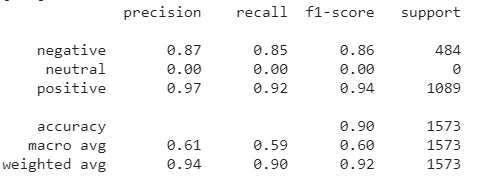




You can achieve these results or even better on this dataset with test data:


<br>


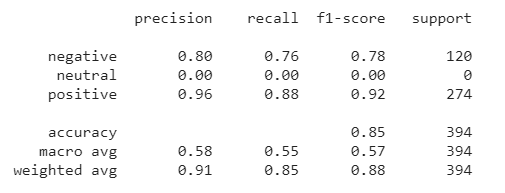

# 1. Install Java 8 and NLU

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
import nlu

--2021-05-05 05:09:06--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                     0%[                    ]       0  --.-KB/s               Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
-                   100%[===================>]   1.63K  --.-KB/s    in 0.001s  

2021-05-05 05:09:06 (1.82 MB/s) - written to stdout [1671/1671]

     |████████████████████████████████| 204.8MB 64kB/s 
     |████████████████████████████████| 153kB 46.5MB/s 
     |████████████████████████████████| 204kB 21.5MB/s 
     |████████████████████████████████| 204kB 50.1MB/s 


# 2. Download Finanical News  Sentiment dataset 
https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news

This dataset contains the sentiments for financial news headlines from the perspective of a retail investor. Further details about the dataset can be found in: Malo, P., Sinha, A., Takala, P., Korhonen, P. and Wallenius, J. (2014): “Good debt or bad debt: Detecting semantic orientations in economic texts.” Journal of the American Society for Information Science and Technology.

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/01/all-data.csv


--2021-05-05 05:10:53--  http://ckl-it.de/wp-content/uploads/2021/01/all-data.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 704799 (688K) [text/csv]
Saving to: ‘all-data.csv’

all-data.csv        100%[===================>] 688.28K  1.22MB/s    in 0.5s    

2021-05-05 05:10:54 (1.22 MB/s) - ‘all-data.csv’ saved [704799/704799]



In [ ]:
import pandas as pd
train_path = '/content/all-data.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
# the label column must have name 'y' name be of type str
columns=['text','y']
train_df = train_df[columns]
train_df = train_df[~train_df["y"].isin(["neutral"])]
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
951,Finnish software developer Basware Oyj said on...,positive
829,"Comptel , a vendor of dynamic Operations Suppo...",positive
760,Espoon kaupunki awarded contracts for personal...,positive
770,Net cash flow from operations is expected to r...,positive
811,The shopping center to be opened in St. Peters...,positive
...,...,...
12,Finnish Talentum reports its operating profit ...,positive
981,The financial impact is estimated to be an ann...,positive
4773,`` I am extremely delighted with this project ...,positive
4080,"Cost cutting measures , which have produced ar...",positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
import nlu 
from sklearn.metrics import classification_report

# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlu.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        14
    positive       0.72      1.00      0.84        36

    accuracy                           0.72        50
   macro avg       0.36      0.50      0.42        50
weighted avg       0.52      0.72      0.60        50



,origin_index,trained_sentiment_confidence,y,text,document,trained_sentiment,sentence,sentence_embedding_use
0,951,0.985986,positive,Finnish software developer Basware Oyj said on...,Finnish software developer Basware Oyj said on...,positive,[Finnish software developer Basware Oyj said o...,"[0.015306072309613228, -0.002737046219408512, ..."
1,829,0.989200,positive,"Comptel , a vendor of dynamic Operations Suppo...","Comptel , a vendor of dynamic Operations Suppo...",positive,"[Comptel , a vendor of dynamic Operations Supp...","[0.04115989804267883, -0.013678845949470997, -..."
2,760,0.968155,positive,Espoon kaupunki awarded contracts for personal...,Espoon kaupunki awarded contracts for personal...,positive,[Espoon kaupunki awarded contracts for persona...,"[0.050158627331256866, 0.011978656984865665, 0..."
3,770,0.983851,positive,Net cash flow from operations is expected to r...,Net cash flow from operations is expected to r...,positive,[Net cash flow from operations is expected to ...,"[0.06134718284010887, 0.020957626402378082, -0..."
4,811,0.974798,positive,The shopping center to be opened in St. Peters...,The shopping center to be opened in St. Peters...,positive,[The shopping center to be opened in St. Peter...,"[0.030753908678889275, -0.009971680119633675, ..."
5,4442,0.965111,negative,Cash flow from operations in January-December ...,Cash flow from operations in January-December ...,positive,[Cash flow from operations in January-December...,"[0.05352102592587471, 0.06253479421138763, -0...."
6,25,0.984061,positive,Nordea Group 's operating profit increased in ...,Nordea Group 's operating profit increased in ...,positive,[Nordea Group 's operating profit increased in...,"[0.0497022308409214, 0.023793146014213562, -0...."
7,378,0.989835,positive,The Finnish supplier of BSS-OSS and VAS for te...,The Finnish supplier of BSS-OSS and VAS for te...,positive,[The Finnish supplier of BSS-OSS and VAS for t...,"[0.03325969725847244, -0.004926654975861311, -..."
8,4096,0.973341,positive,"Following the transaction , Lundbeck has world...","Following the transaction , Lundbeck has world...",positive,"[Following the transaction , Lundbeck has worl...","[0.07471615076065063, -0.04718644917011261, -0..."
9,169,0.981174,positive,Both operating profit and net sales for the th...,Both operating profit and net sales for the th...,positive,[Both operating profit and net sales for the t...,"[0.03235051780939102, 0.03737620636820793, -0...."


# 4. Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict('According to the most recent update there has been a major decrese in the rate of oil')

,origin_index,trained_sentiment_confidence,document,trained_sentiment,sentence,sentence_embedding_use
0,0,0.94103,According to the most recent update there has ...,positive,[According to the most recent update there has...,"[0.009911456145346165, 0.04162858799099922, -0..."


## 5. Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['sentiment_dl'] has settable params:
pipe['sentiment_dl'].setMaxEpochs(1)                 | Info: Maximum number of epochs to train | Currently set to : 1
pipe['sentiment_dl'].setLr(0.005)                    | Info: Learning Rate | Currently set to : 0.005
pipe['sentiment_dl'].setBatchSize(64)                | Info: Batch size | Currently set to : 64
pipe['sentiment_dl'].setDropout(0.5)                 | Info: Dropout coefficient | Currently set to : 0.5
pipe['sentiment_dl'].setEnableOutputLogs(True)       | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
pipe['sentiment_dl'].setThreshold(0.6)               | Info: The minimum threshold for the final result otheriwse it will be neutral | Currently set to : 0.6
pipe['sentiment_dl'].setThresholdLabel('neutral')    | Info: In case the score is less than threshold, what should be the label. Default i

## 6. Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe = nlu.load('train.sentiment')
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(5)  
fitted_pipe = trainable_pipe.fit(train_df.iloc[:100])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        31
     neutral       0.00      0.00      0.00         0
    positive       0.86      0.99      0.92        69

    accuracy                           0.68       100
   macro avg       0.29      0.33      0.31       100
weighted avg       0.59      0.68      0.63       100



,origin_index,trained_sentiment_confidence,y,text,document,trained_sentiment,sentence,sentence_embedding_use
0,951,0.999660,positive,Finnish software developer Basware Oyj said on...,Finnish software developer Basware Oyj said on...,positive,[Finnish software developer Basware Oyj said o...,"[0.015306072309613228, -0.002737046219408512, ..."
1,829,0.999917,positive,"Comptel , a vendor of dynamic Operations Suppo...","Comptel , a vendor of dynamic Operations Suppo...",positive,"[Comptel , a vendor of dynamic Operations Supp...","[0.04115989804267883, -0.013678845949470997, -..."
2,760,0.997053,positive,Espoon kaupunki awarded contracts for personal...,Espoon kaupunki awarded contracts for personal...,positive,[Espoon kaupunki awarded contracts for persona...,"[0.050158627331256866, 0.011978656984865665, 0..."
3,770,0.958511,positive,Net cash flow from operations is expected to r...,Net cash flow from operations is expected to r...,positive,[Net cash flow from operations is expected to ...,"[0.06134718284010887, 0.020957626402378082, -0..."
4,811,0.978840,positive,The shopping center to be opened in St. Peters...,The shopping center to be opened in St. Peters...,positive,[The shopping center to be opened in St. Peter...,"[0.030753908678889275, -0.009971680119633675, ..."
...,...,...,...,...,...,...,...,...
95,689,0.897502,positive,"Finnish Sampo Bank , of Danish Danske Bank gro...","Finnish Sampo Bank , of Danish Danske Bank gro...",positive,"[Finnish Sampo Bank , of Danish Danske Bank gr...","[0.06391362845897675, 0.028690673410892487, -0..."
96,1998,0.979267,positive,Talentum expects that the net sales of its cor...,Talentum expects that the net sales of its cor...,positive,[Talentum expects that the net sales of its co...,"[0.07739534974098206, 0.037561606615781784, -0..."
97,4458,0.997499,positive,efficiency improvement measures 20 January 201...,efficiency improvement measures 20 January 201...,positive,[efficiency improvement measures 20 January 20...,"[0.056025125086307526, 0.054798685014247894, -..."
98,4415,0.518980,negative,"Operating profit , excluding non-recurring ite...","Operating profit , excluding non-recurring ite...",neutral,"[Operating profit , excluding non-recurring it...","[0.031145866960287094, 0.051556773483753204, -..."


#7.  Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
trainable_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(70)  
trainable_pipe['trainable_sentiment_dl'].setLr(0.0005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    negative       0.87      0.84      0.86       488
     neutral       0.00      0.00      0.00         0
    positive       0.96      0.92      0.94      1085

    accuracy                           0.90      1573
   macro avg       0.61      0.59      0.60      1573
weighted avg       0.94      0.90      0.92      1573



# 7.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.84      0.76      0.80       116
     neutral       0.00      0.00      0.00         0
    positive       0.95      0.90      0.93       278

    accuracy                           0.86       394
   macro avg       0.60      0.55      0.57       394
weighted avg       0.92      0.86      0.89       394



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('According to the most recent update there has been a major decrese in the rate of oil')
preds

,origin_index,sentiment,sentence_embedding_from_disk,text,sentiment_confidence,document,sentence
0,8589934592,[negative],"[[-0.021685948595404625, 0.13073018193244934, ...",According to the most recent update there has ...,[0.86657214],According to the most recent update there has ...,[According to the most recent update there has...


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')                                    | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'] has settable params:
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setExplodeSentences(False)  | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setStorageRef('SentenceDetectorDLModel_c83c27f46b97')  | Info: storage unique identifier | Currently set to : SentenceDetectorDLModel_c83c27f46b97
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setEncoder(com.johnsnowlabs.nlp.anno